In [26]:
library(dplyr)
library(xts)
library(TTR)

In [52]:
df = read.csv("../data/Daily_Demand_Forecasting_Orders.csv",sep=";")
head(df)
dim(df)

Week.of.the.month..first.week..second..third..fourth.or.fifth.week,Day.of.the.week..Monday.to.Friday.,Non.urgent.order,Urgent.order,Order.type.A,Order.type.B,Order.type.C,Fiscal.sector.orders,Orders.from.the.traffic.controller.sector,Banking.orders..1.,Banking.orders..2.,Banking.orders..3.,Target..Total.orders.
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364


[1] 60 13

In [53]:
orders <- df[,c(1,2,13)]
names(orders) <- c("week","weekday","total")

In [54]:
head(orders)

week,weekday,total
<int>,<int>,<dbl>
1,4,539.577
1,5,224.675
1,6,129.412
2,2,317.120
2,3,210.517
2,4,207.364


In [55]:
### create a time-series dataset based on the data
orders.ts <- ts(orders$total, start=c(1), end=c(60), frequency=5)
#ts--for timeseries
#orders$total--our y, 
#start=c(1)--starting with day 1, 
#end=c(60)--ending with day 60, 
#frequency=5--since we take only the day of work wich are only 5)


In [56]:
head(orders.ts)

[1] 539.577 224.675 129.412 317.120 210.517 207.364

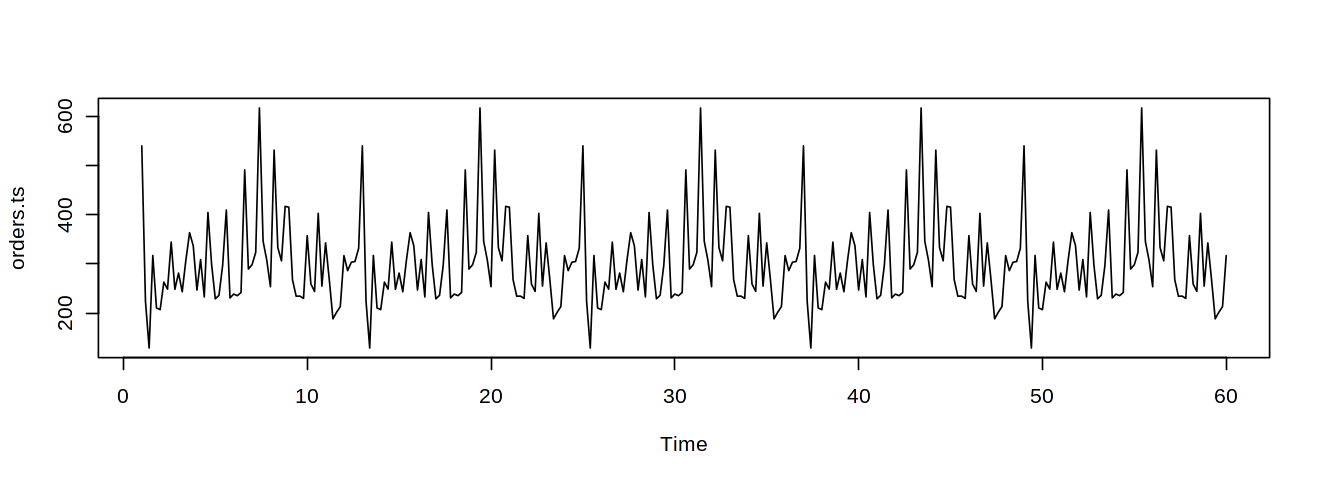

In [57]:
plot(orders.ts)

In [58]:
# this function use the "moving avarage" and we defined it to take every 5 days and do the avaragema5
ma5<- TTR::SMA(orders.ts,n=5)
#we can do every 2 days "moving avarge of 2 days"
ma2<- TTR::SMA(orders.ts,n=2)

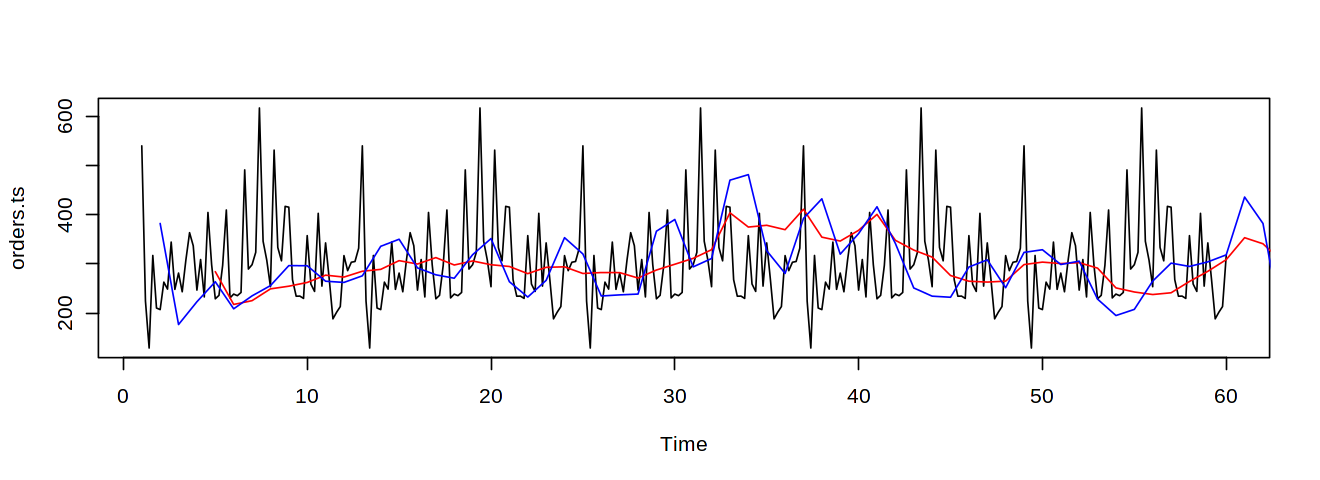

In [59]:
options(repr.plot.width= 11, repr.plot.height= 4) 
plot(orders.ts)
lines(ma5,col="red")
lines(ma2,col="blue")

In [60]:
## Time Series Decomposition

In [61]:
stationary_orders.ts <- decompose(orders.ts)

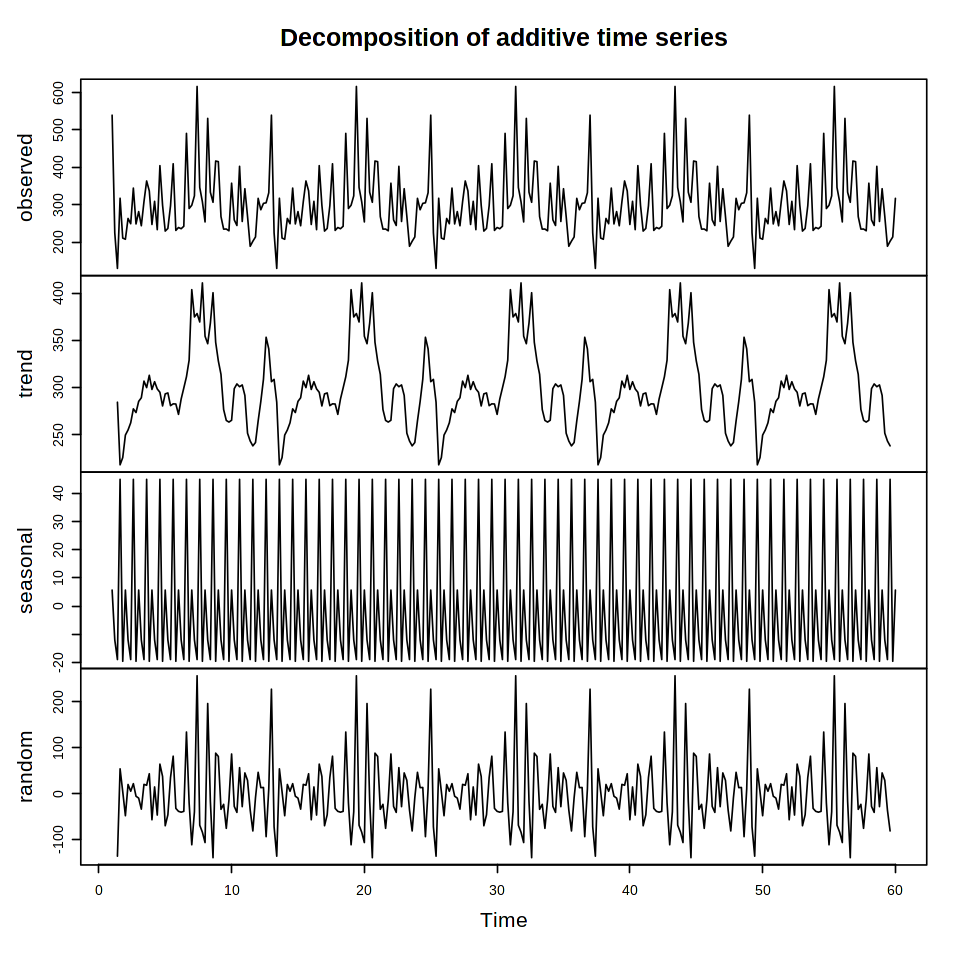

In [62]:
#the decomposition split the data for the original, the trend, seasonal, and the noize
options(repr.plot.width= 8, repr.plot.height= 8) 
plot(stationary_orders.ts)

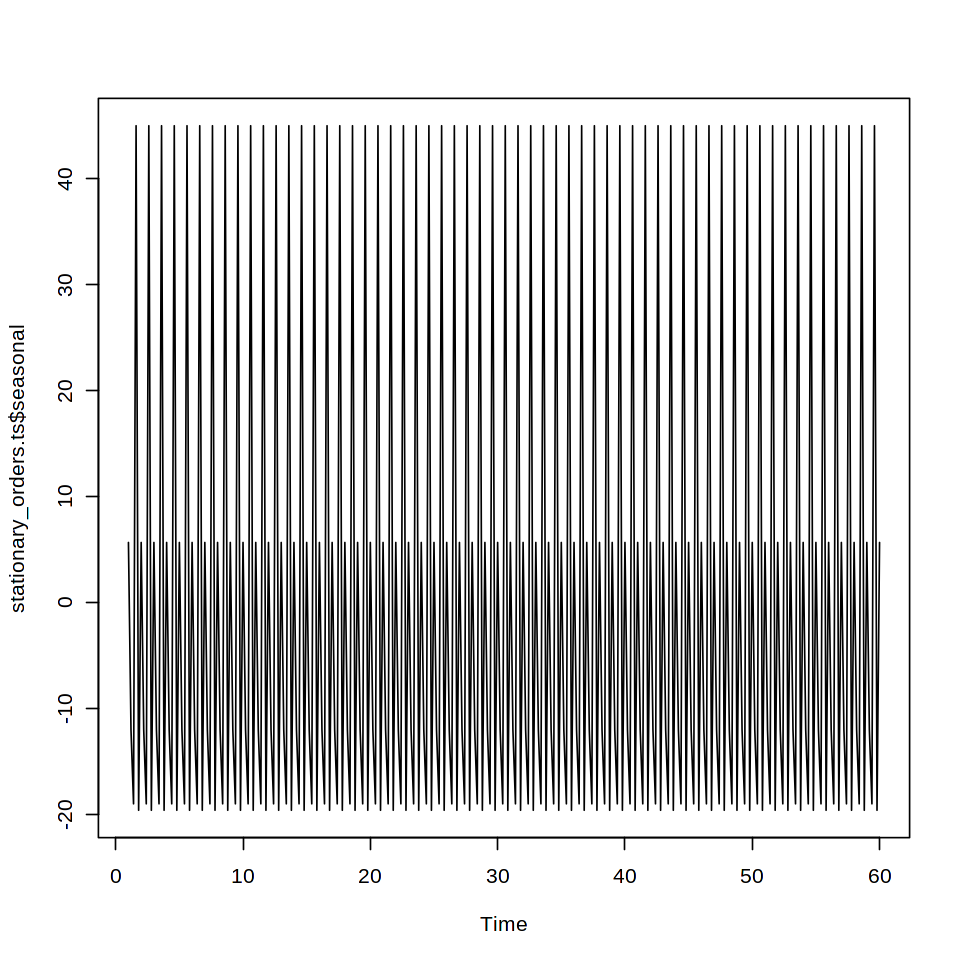

In [63]:
#we can take only the seasonality and add to the data as a variable to enreach it
plot(stationary_orders.ts$seasonal)

In [69]:
# FIRST WE WIL CHANGE THE SEASONALITY TO A MATRIX BECASUE OUR DATA IS MATRIX
matrix(stationary_orders.ts$seasonal,ncol=5,byrow=T)

Warning message in matrix(stationary_orders.ts$seasonal, ncol = 5, byrow = T):
“data length [296] is not a sub-multiple or multiple of the number of rows [60]”


5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129
5.657766,-12.030448,-19.00499,44.98896,-19.61129


In [77]:
stationary_orders.ts$seasonal[1:5]

[1]   5.657766 -12.030448 -19.004986  44.988957 -19.611289

In [78]:
#now we add to the data the seasonality
orders2 <- orders
orders2$season <- (stationary_orders.ts$seasonal[1:5])

In [79]:
season1 <- data.frame(weekday=c(4,5,6,2,3)#because the data starts at day 4
                     ,season=stationary_orders.ts$seasonal[1:5])

In [80]:
head(season1 )

weekday,season
<dbl>,<dbl>
4,5.657766
5,-12.030448
6,-19.004986
2,44.988957
3,-19.611289


In [82]:
orders2 <- left_join(orders,season1)
head(orders2)

Joining, by = "weekday"


week,weekday,total,season
<int>,<dbl>,<dbl>,<dbl>
1,4,539.577,5.657766
1,5,224.675,-12.030448
1,6,129.412,-19.004986
2,2,317.120,44.988957
2,3,210.517,-19.611289
2,4,207.364,5.657766


In [ ]:
### Predicting the future tendency using ARIMA regression
 
To be able to run the ARIMA model, we have to determine three parameters: p, d ,q. 
They derivative parts of the AR-I-MA. The p part is obtined by examining the autocorrelation of the series. 
We need to determine the correct time lag to define the parameters of the model by running the autocorrelation (acf) and partial autocorrelation (pacf) functions.
#in the seasonality we give the stasyonarity, and we can get a "machzoriut", and we can predict by this . but if we dont have a nice stacionar it is a problam
#we canot do a model of the noise

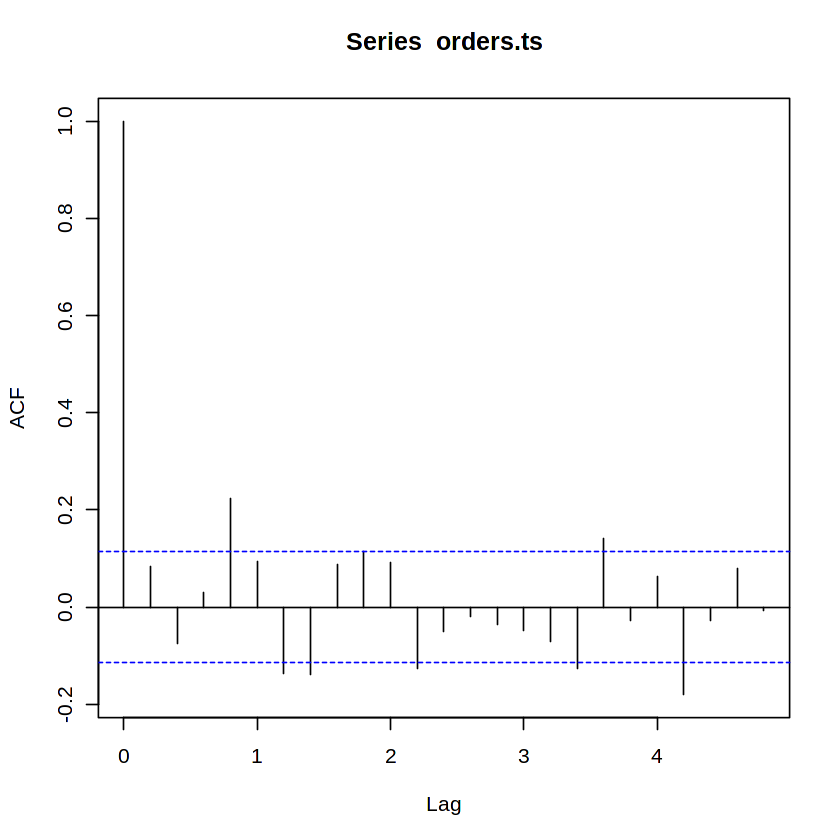

In [18]:
acf(orders.ts)

On our data, acf doesn't show us a useful value for our parameters, as all the data is over the confidence values (blue dotted lines)

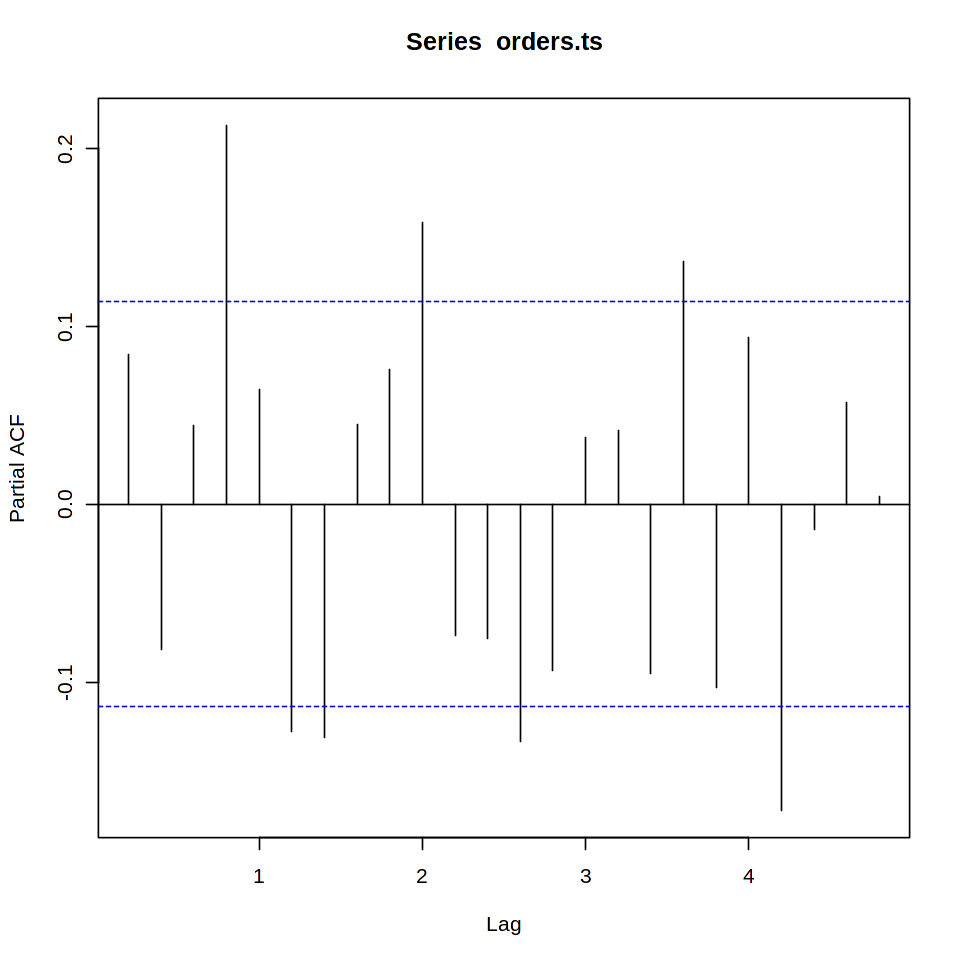

In [40]:
pacf(orders.ts)

On the other hand, the pacf function show that the first lag is positive and outside than the confidence levels (blue dotted line). The second lag was negative and was outside the confidence levels. The third and following lags were lower and inside the confidence levels. Thus, the value that define our time lag for the model is 2.

The d parameter is defined by the integrative part of the model and is defined by the difference subtracting its current and previous values d times.

The q part of the model is determined by the moving average (MA) of the model.

We will begin assumming the d and q as zero.

Finally, having the required parameters, we proced to run the arima model as:  arima(data, order=c(p,d,q)) 

In [85]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff



In [87]:
orders.ts_fit <- auto.arima(orders.ts)
orders.ts_fit

Series: orders.ts 
ARIMA(1,0,0)(1,0,0)[5] with non-zero mean 

Coefficients:
         ar1    sar1      mean
      0.0789  0.0912  300.7418
s.e.  0.0588  0.0592    6.1510

sigma^2 estimated as 7955:  log likelihood=-1747.8
AIC=3503.6   AICc=3503.73   BIC=3518.36

Forecasting using the ARIMA predictive model

In [88]:
pred <- forecast(orders.ts_fit)

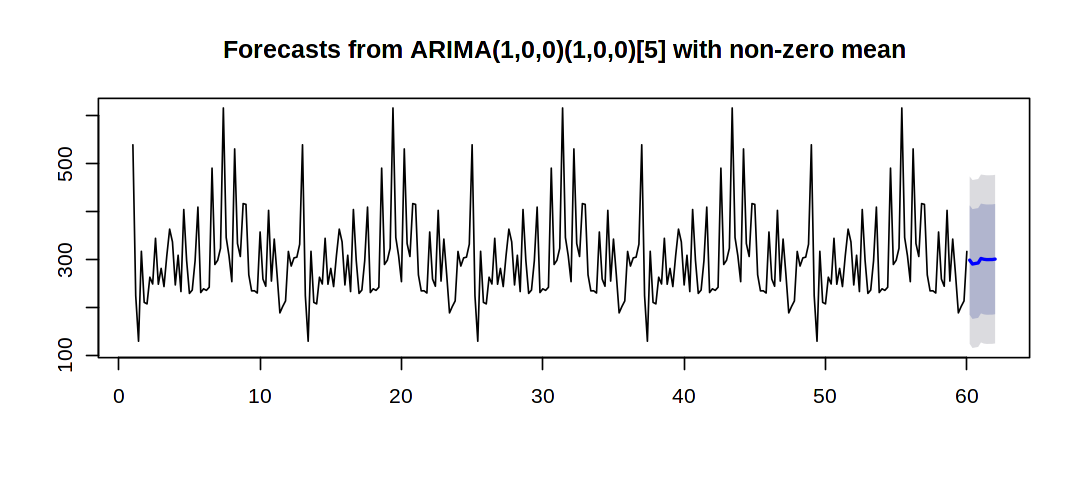

In [92]:
options(repr.plot.width= 9, repr.plot.height= 4)
plot(pred)